## 머신 러닝 개념

### 인공지능(AI) 분류
#### [1] 규칙기반 AI : rule-based system , 수동으로 규칙(특징)을 입력하면 기계가 추론, Prolog, LISP
#### [2] 학습기반 AI : 머신 러닝(Machine Learning), 데이터를 입력하면 기계가 스스로 새로운 특징을 학습하고 예측

### 머신러닝 분류

#### [1] 지도학습(Supervised Learning) : 답이 주어진 상태에서 학습
* 회귀(Regression)
* 분류(Classification) 

#### [2] 비지도학습(Unsupervised Learning) : 답을 모르고 학습
* 군집화(Clustering)
* 차원 축소(Dimension Reduction) : PCA(주성분 분석, Pricipal Component Analysis)

#### [3] 강화 학습(Reinforcement Learning) : 답을 모르고 있는 상태에서 답을 알아가는 강한 인공지능(자아를 갖음, 인간수준)
게임, 알파고(DQN)

### 회귀 (Regression) 모델
#### [1] 선형 회귀(Linear Regression) : 1차 함수, 직선의 방정식 
#### [2] 가중치(Weight) : 입력변수가 출력에 영향을 미치는 정도를 설정, 기울기 값 , 회귀 계수
#### [3] 편향(Bias) : 기본 출력 값이 활성화 되는 정도를 설정, y 절편, 회귀 계수
#### [4] 비용함수(Cost Function) : 2차 함수, 포물선의 방정식, (예측값 - 실제값)^2
* cost(비용) = 오차 = 에러 = 손실(loss)
* cost(W,b) = (H(x) - y)^2

#### [5] 예측(가설,Hypothesis) 함수: predict,  H(x) : 예측 값,  y:답,결정값,target,label,     x:입력,feature(피쳐)
* H(X) = W*X + b

#### [6] 경사 하강법(Gradient Descent Algorithm)
#### : 비용이 가장 작은 기울기 값을 구하는 알고리즘

w:-1, cost: 18.666666666666668
w:0,  cost: 4.666666666666667
w:1,  cost: 0.0
w:2,  cost: 4.666666666666667
w:3,  cost: 18.666666666666668


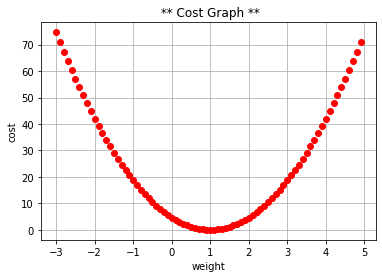

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 비용함수의 구현
def cost(x,y,w):     
    c = 0
    for k in range(len(x)):
        hx = w * x[k]        # 예측 함수
        loss = (hx - y[k])**2   # 비용함수 ,(예측값 - 실제값)^2
        c += loss
    return c/len(x)          # 평균 제곱 오차   

x = [1,2,3]   # 입력 값  ,         독립 변수
y = [1,2,3]   # 실제값,답, target, 종속 변수

print('w:-1, cost:',cost(x,y,-1))   # hx = [-1,-2,-3]
print('w:0,  cost:',cost(x,y,0))    # hx = [0,0,0]
print('w:1,  cost:',cost(x,y,1))    # hx = [1,2,3]  , cost: 0.0
print('w:2,  cost:',cost(x,y,2))    # hx = [2,4,6]  
print('w:3,  cost:',cost(x,y,3))    # hx = [3,6,9] 

# 비용함수 시각화 : x축은 weight, y축은 cost로 하는 2차 함수, 포물선의 방정식
for k in range(-30,50):
    w = k/10
    c = cost(x,y,w)
    plt.plot(w,c,'ro')
    
plt.title(' ** Cost Graph **') 
plt.xlabel('weight')
plt.ylabel('cost')
plt.grid(True)
plt.show()

### 미분 : 순간 변화량,기울기, x 축으로 1 만큼 움직였을 때 y 축으로 움직인 거리
#### 함수 미분 공식 정리 :  f(x) = x ^n   ===>  f'(x) = n*x^(n-1)
* y = 3            ===>    y' = 0
* y = 2*x          ===>    y' = 2
* y = x^2          ===>    y' = 2*x
* y = (x + 1)^2    ===>    y' = 2*(x + 1)
#### ( y = x^2 + 2*x + 1  ===>  y' = 2*x + 2 = 2*(x + 1)

In [ ]:
# 경사 하강법 알고리즘 함수 구현, 미분 적용
# W : W - (학습율)* 미분값     ==> 가중치를 업데이트한다
def gradient_descent(x,y,w):
    c = 0
    for i in range(len(x)):
        hx = w*x[i]
        loss = (hx - y[i])*x[i]  # 곱하기 2를 생략한 비용함수의 미분 공식
        c += loss
        # 비용함수의 미분 : cost(w) = (w*x[i] - y[i])^2 의 미분
        # (a + b)^2 = a^2 + 2*a*b + b^2
        # cost(w) = w^2 * x[i]^2 - 2 * w * x[i] * y[i] + y[i]^2
        # cost'(w) = 2*w*x[i]^2 - 2 * x[i] * y[i] = 2*x[i]*(w*x[i] - y[i]) ==> (hx - y[i])*x[i]
    return c/len(x)   